In [25]:
from src.topoexplainer import TopoExplainer
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # for building the model
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RandomForestRegressor(n_estimators=10, random_state=0)

# Build some toy example

In [46]:
n_pts = 2000
dim_pts = 4

points = ss.uniform().rvs((n_pts, dim_pts))
y_train = 2*points[:, 0] -4*points[:, 1] + 7*points[:, 2] -points[:, 3] + 10*points[:, 0]*points[:, 1] + 0.1*points[:, 3]**2
# add gausian noise
noise = ss.norm().rvs(n_pts)
y_train += noise
X_train = pd.DataFrame(points, columns=[f'X{i}' for i in range(dim_pts)])
X_train

,X0,X1,X2,X3
0,0.005643,0.857609,0.346891,0.492496
1,0.775760,0.765722,0.839402,0.488410
2,0.673408,0.747424,0.020277,0.042635
3,0.017754,0.185917,0.259352,0.025710
4,0.609402,0.360131,0.142759,0.472046
...,...,...,...,...
1995,0.001753,0.646884,0.099171,0.461227
1996,0.328667,0.718538,0.763979,0.634167
1997,0.253887,0.093167,0.615198,0.723274
1998,0.376568,0.925636,0.224086,0.056808


## Train linear Regression and RandomForest

In [47]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Use SHAP values

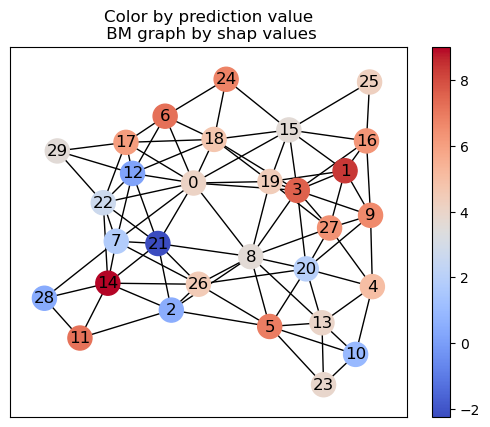

In [3]:
te = TopoExplainer(model=model, data=X_train)
te.explain_shap_space(eps=1.5)
te.plot_explainability_graph()

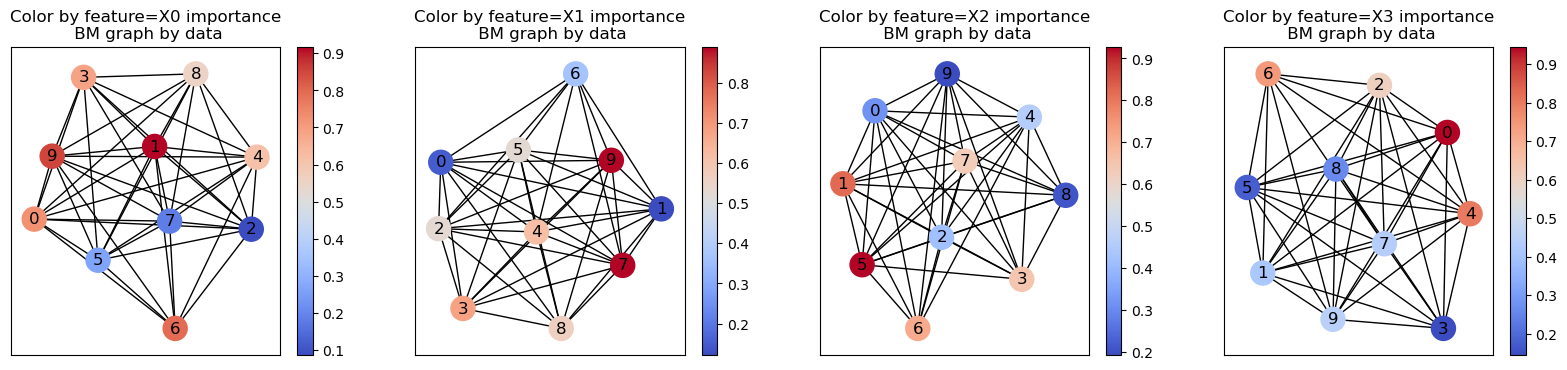

In [4]:
te.explain_data_space(eps=0.75)
fig, axs = plt.subplots(1, X_train.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_train.columns):
    te.plot_explainability_graph(feature=feature, ax=ax)

## Use absolute SHAP values

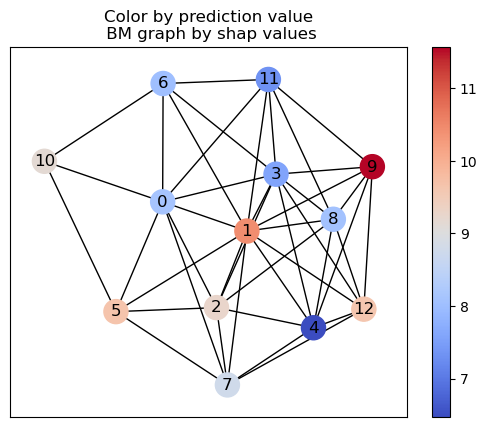

In [5]:
te_abs = TopoExplainer(model=model, data=X_train, use_absolute_shap=True)
te_abs.explain_shap_space(eps=1.5)
te_abs.plot_explainability_graph()

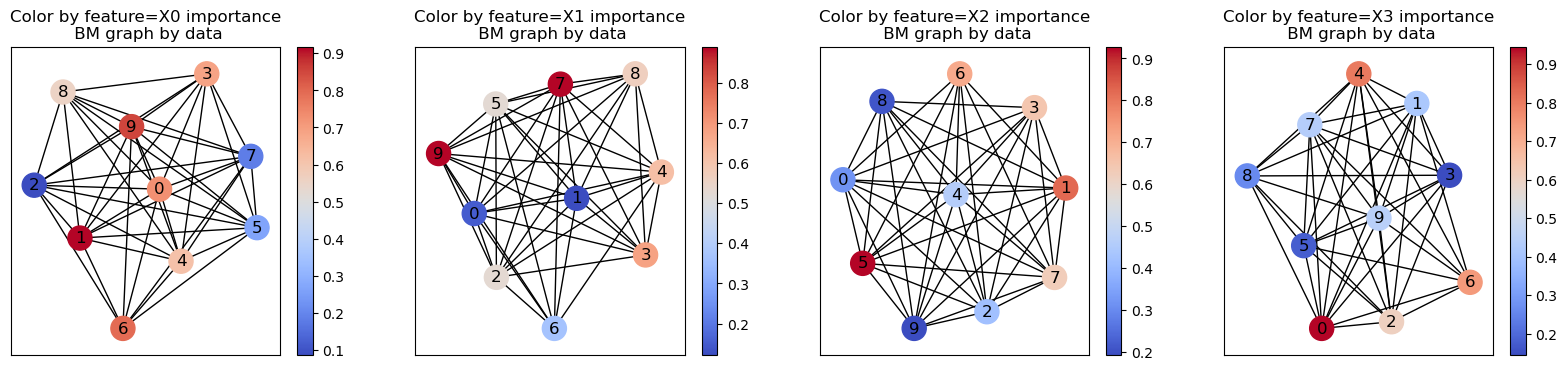

In [6]:
te_abs.explain_data_space(eps=0.75)
fig, axs = plt.subplots(1, X_train.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_train.columns):
    te_abs.plot_explainability_graph(feature=feature, ax=ax)

# Date some read data
https://archive.ics.uci.edu/dataset/60/liver+disorders

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features 
y = liver_disorders.data.targets 
  
# metadata 
print(liver_disorders.metadata) 
  
# variable information 
print(liver_disorders.variables) 

{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

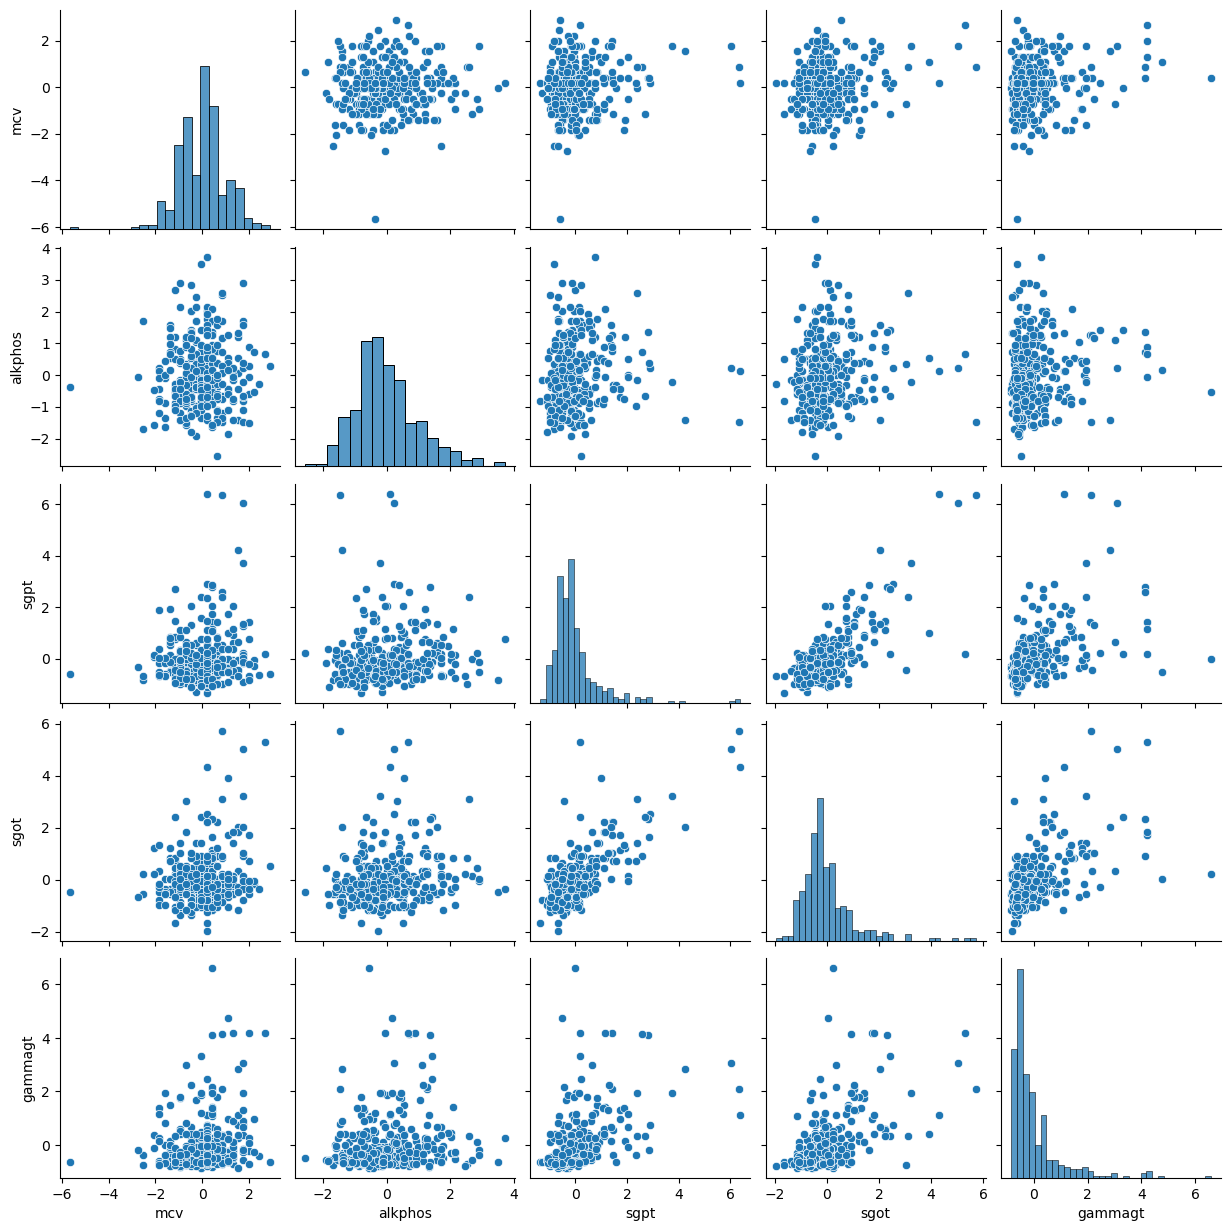

In [28]:
# Standarize input data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
sns.pairplot(X_scaled)

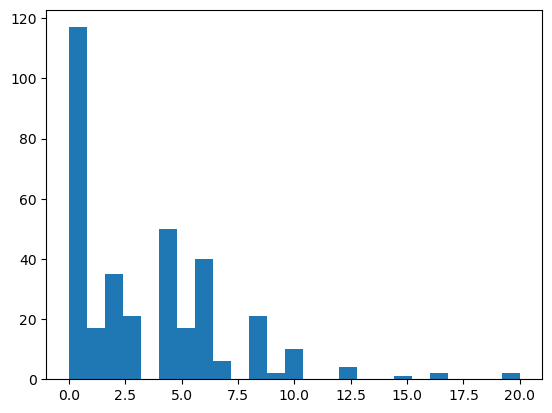

In [34]:
_ = plt.hist(y, bins=25)

In [35]:
# fit Linear Regression and RandomForest
lr = LinearRegression()
lr.fit(X_scaled, y)

rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_scaled, y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(n_estimators=10, random_state=0)

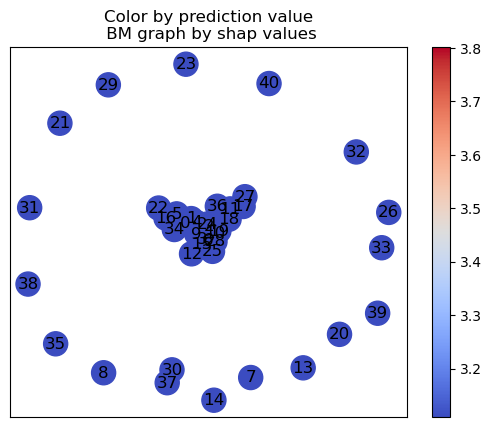

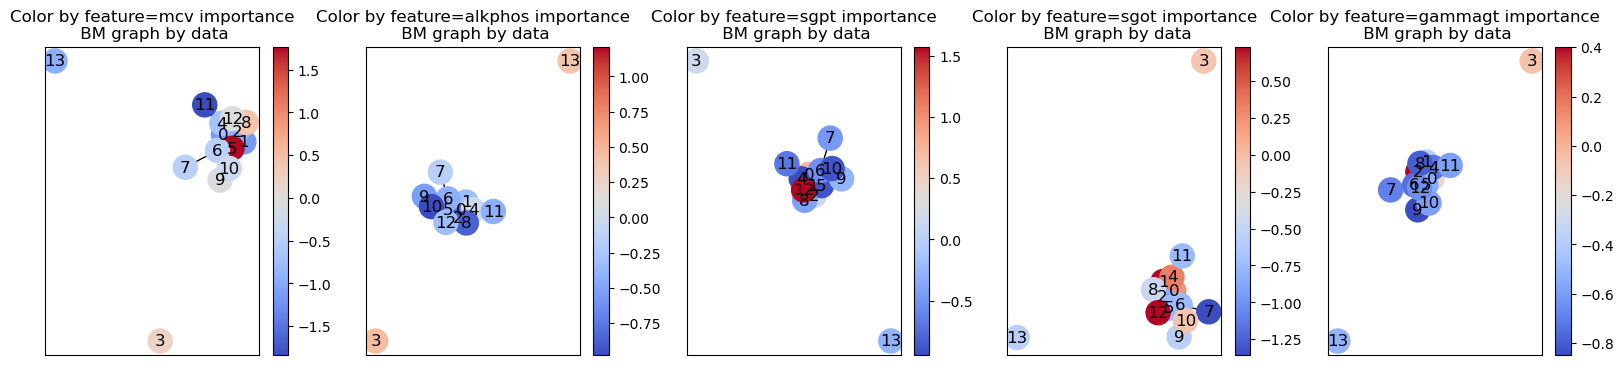

In [41]:
te_lr = TopoExplainer(model=lr, data=X_scaled)
te_lr.explain_shap_space(eps=.75)
te_lr.plot_explainability_graph()
te_lr.explain_data_space(eps=3)
fig, axs = plt.subplots(1, X_scaled.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_scaled.columns):
    te_lr.plot_explainability_graph(feature=feature, ax=ax)

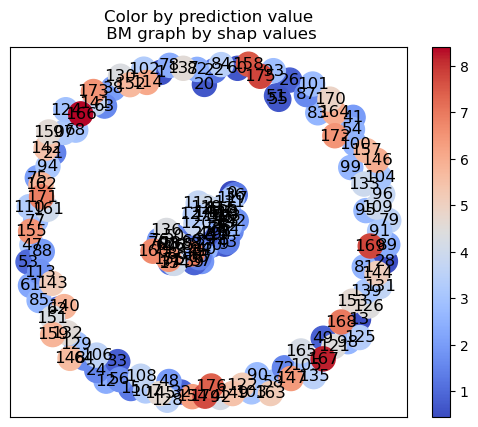

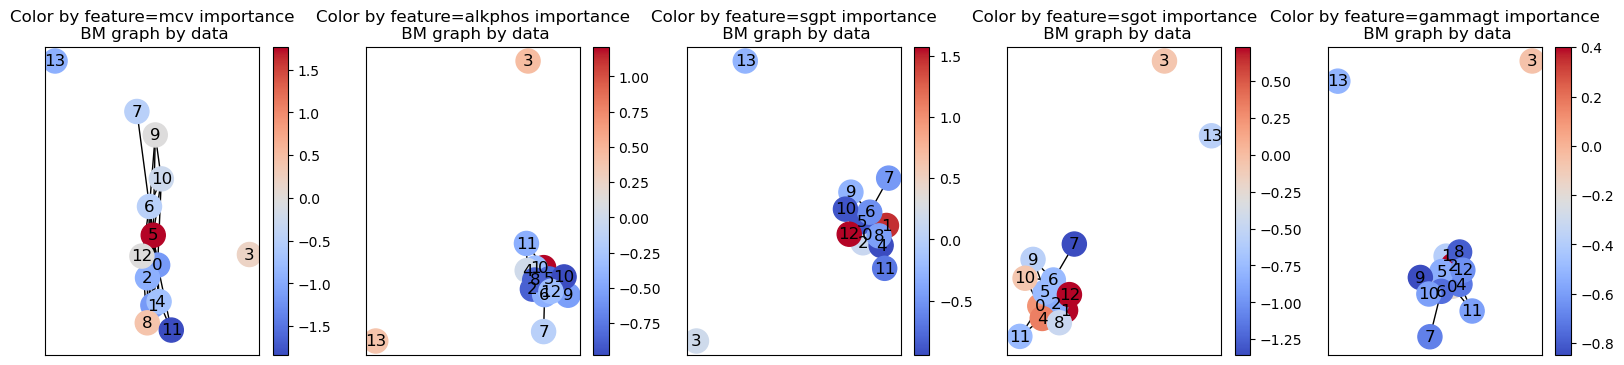

In [44]:
te_rf = TopoExplainer(model=rf, data=X_scaled)
te_rf.explain_shap_space(eps=.5)
te_rf.plot_explainability_graph()
te_rf.explain_data_space(eps=3)
fig, axs = plt.subplots(1, X_scaled.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_scaled.columns):
    te_rf.plot_explainability_graph(feature=feature, ax=ax)